In [462]:
# Read AQI Data, calculate average AQI in a week
# Read Population Data, Area Data, Make density 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [463]:
df_merge= pd.read_csv('../data/Merge_static.csv')
df_merge = df_merge[['City','Country','Population']]



In [464]:
df_country = pd.read_csv('../get_gdp/country_gdp.csv')
df_country.sort_values(by=['gdpPerCapita'],ascending=False,inplace=True)
df_countryGDP = df_country.reset_index()

l = [i for i in range(1,212)]
# print(l)
df_countryGDP['gdp_rank'] = pd.DataFrame(l)
df_countryGDP = df_countryGDP[['country','gdpPerCapita','gdp_rank']]


In [465]:
print(df_countryGDP)


           country  gdpPerCapita  gdp_rank
0           Monaco   163701.2700         1
1    Liechtenstein   161926.2103         2
2       Luxembourg   116085.9716         3
3          Bermuda    98684.8285         4
4            Macau    94408.5153         5
..             ...           ...       ...
206     Madagascar      476.3726       207
207          Niger      422.9071       208
208         Malawi      400.0980       209
209        Burundi      303.0493       210
210    South Sudan      245.6645       211

[211 rows x 3 columns]


In [466]:
import pandasql as ps
sql = 'SELECT df_merge.*, df_countryGDP.gdp_rank  from df_merge,df_countryGDP WHERE df_merge.Country = df_countryGDP.country'
df_gdp = ps.sqldf(sql,locals())
df_gdp

,City,Country,Population,gdp_rank
0,Tokyo,Japan,37339804,29
1,Delhi,India,31181376,159
2,Shanghai,China,27795702,86
3,Sao Paulo,Brazil,22237472,89
4,Mexico City,Mexico,21918936,88
...,...,...,...,...
1165,Kolwezi,DR Congo,501375,201
1166,Kabinda,DR Congo,501054,201
1167,Jianyang,China,500925,86
1168,Douai-Lens,France,500921,28


In [467]:
# Read AQ
def average_AQI(file=''):
    df = pd.read_csv(file)
    df = df[['city','AQI']]
    df_result = df.groupby('city').mean()
    df_result.columns = ['avg_AQI']
    return df_result
# Read AQ
def max_AQI(file=''):
    df = pd.read_csv(file)
    df = df[['city','AQI']]
    df_result = df.groupby('city').max()
    df_result.columns = ['max_AQI']
    return df_result

def min_AQI(file=''):
    df = pd.read_csv(file)
    df = df[['city','AQI']]
    df_result = df.groupby('city').min()
    df_result.columns = ['min_AQI']
    return df_result
df_avg_aqi = average_AQI('../ProcessedAQI/Final/aqi.csv')
df_max_aqi = max_AQI('../ProcessedAQI/Final/aqi.csv')
df_min_aqi = min_AQI('../ProcessedAQI/Final/aqi.csv')
df = pd.merge(df_avg_aqi, df_max_aqi, on="city")
df = pd.merge(df, df_min_aqi, on="city")
df_aqi = pd.DataFrame(df)
df_aqi

,avg_AQI,max_AQI,min_AQI
city,,,
Abeokuta,71.500000,91.0,36.0
Abidjan,64.583333,96.0,51.0
Abu Dhabi,84.512658,132.0,53.0
Abuja,88.750000,126.0,68.0
Acapulco de Juarez,70.546053,167.0,36.0
...,...,...,...
Zhaoqing,94.105263,131.0,55.0
Zhengzhou,166.096386,263.0,106.0
Zhenjiang Jiangsu,163.550633,192.0,130.0


In [468]:
import pandasql as ps
sql2 = 'SELECT * From df_aqi JOIN df_gdp ON df_aqi.city = df_gdp.City'
df_result = ps.sqldf(sql2,locals())

In [469]:
df_result = df_result.drop_duplicates()
df_result = df_result[['city','avg_AQI','max_AQI','min_AQI','Country','gdp_rank']]

In [470]:
df_result

,city,avg_AQI,max_AQI,min_AQI,Country,gdp_rank
0,Tokyo,59.913043,126.0,24.0,Japan,29
1,Delhi,205.879518,329.0,63.0,India,159
2,Shanghai,113.939759,212.0,56.0,China,86
3,Sao Paulo,72.716867,212.0,54.0,Brazil,89
4,Mexico City,121.436364,222.0,54.0,Mexico,88
...,...,...,...,...,...,...
712,Arusha,87.200000,98.0,66.0,Tanzania,183
713,Murcia,31.592308,81.0,14.0,Spain,41
714,Tirana,40.335821,87.0,15.0,Albania,116
715,Surat Thani,87.400000,154.0,30.0,Thailand,102


In [471]:

# df_green = df_result[df_result['avg_AQI'].between(1,50)]
# df_yellow = df_result[df_result['avg_AQI'].between(51,100)]
# df_orange = df_result[df_result['avg_AQI'].between(101,151)]
# df_red = df_result[df_result['avg_AQI'].between(151,200)]
# df_purple = df_result[df_result['avg_AQI'].between(201,300)]
# df_maroon = df_result[df_result['avg_AQI']>300]


In [481]:
def get_barchart_statistic(cmap:list):
    d={}

    d1 = {x:int(cmap.count(x)) for x in cmap}
    for key in d1.keys():
        d[key] = d1[key]
    # print(d)
    return d

def plot_hist(input='',df_re=None):
    df_result = df_re.copy()
    df_green = df_result[df_result[input].between(1,50)]
    df_yellow = df_result[df_result[input].between(51,100)]
    df_orange = df_result[df_result[input].between(101,151)]
    df_red = df_result[df_result[input].between(151,200)]
    df_purple = df_result[df_result[input].between(201,300)]
    df_maroon = df_result[df_result[input]>300]
    fig = plt.figure(figsize = (24,15))

    #### Subplot 1###

    plt.subplot(2,3,1)
    #Add titles to the chart and axes
    plt.title('Green')
    plt.xlabel('GDP rank')
    x = df_green['gdp_rank'].tolist()
    d1 = get_barchart_statistic(x)
    # x = list(d1.keys())
    # y = list(d1.values())
    plt.hist(d1.keys(),bins=50)
    # plt.plot(x,y)
    plt.xticks(np.arange(0, 212, 20))
    plt.yticks(np.arange(0, 10, 1))
    plt.ylabel('Number of cities')

    #### Subplot 2###

    plt.subplot(2,3,2)
    #Add titles to the chart and axes
    plt.title('Yellow')
    plt.xlabel('GDP rank')
    x = df_yellow['gdp_rank'].tolist()
    d1 = get_barchart_statistic(x)
    plt.hist(d1.keys(),bins=50)
    plt.xticks(np.arange(0, 212, 20))
    plt.yticks(np.arange(0, 10, 1))
    plt.ylabel('Number of cities')

    #### Subplot 3###

    plt.subplot(2,3,3)
    #Add titles to the chart and axes
    plt.title('Orange')
    plt.xlabel('GDP rank')
    x = df_orange['gdp_rank'].tolist()
    d1 = get_barchart_statistic(x)
    plt.hist(d1.keys(),bins=50)
    plt.xticks(np.arange(0, 212, 20))
    plt.yticks(np.arange(0, 10, 1))
    plt.ylabel('Number of cities')

    #### Subplot 4###

    plt.subplot(2,3,4)
    #Add titles to the chart and axes
    plt.title('Red')
    plt.xlabel('GDP rank')
    x = df_red['gdp_rank'].tolist()
    d1 = get_barchart_statistic(x)
    plt.hist(d1.keys(),bins=50)
    plt.xticks(np.arange(0, 212, 20))
    plt.yticks(np.arange(0, 10, 1))
    plt.ylabel('Number of cities')


    #### Subplot 5###

    plt.subplot(2,3,5)
    #Add titles to the chart and axes
    plt.title('Purple')
    plt.xlabel('GDP rank')
    x = df_purple['gdp_rank'].tolist()
    d1 = get_barchart_statistic(x)
    plt.hist(d1.keys(),bins=50)
    plt.xticks(np.arange(0, 212, 20))
    plt.yticks(np.arange(0, 10, 1))
    plt.ylabel('Number of cities')

    #### Subplot 6###

    plt.subplot(2,3,6)
    #Add titles to the chart and axes
    plt.title('Maroon')
    plt.xlabel('GDP rank')
    x = df_maroon['gdp_rank'].tolist()
    d1 = get_barchart_statistic(x)
    plt.hist(d1.keys(),bins=50)
    plt.xticks(np.arange(0, 212, 20))
    plt.yticks(np.arange(0, 10, 1))
    plt.ylabel('Number of cities')

    plt.plot()



  


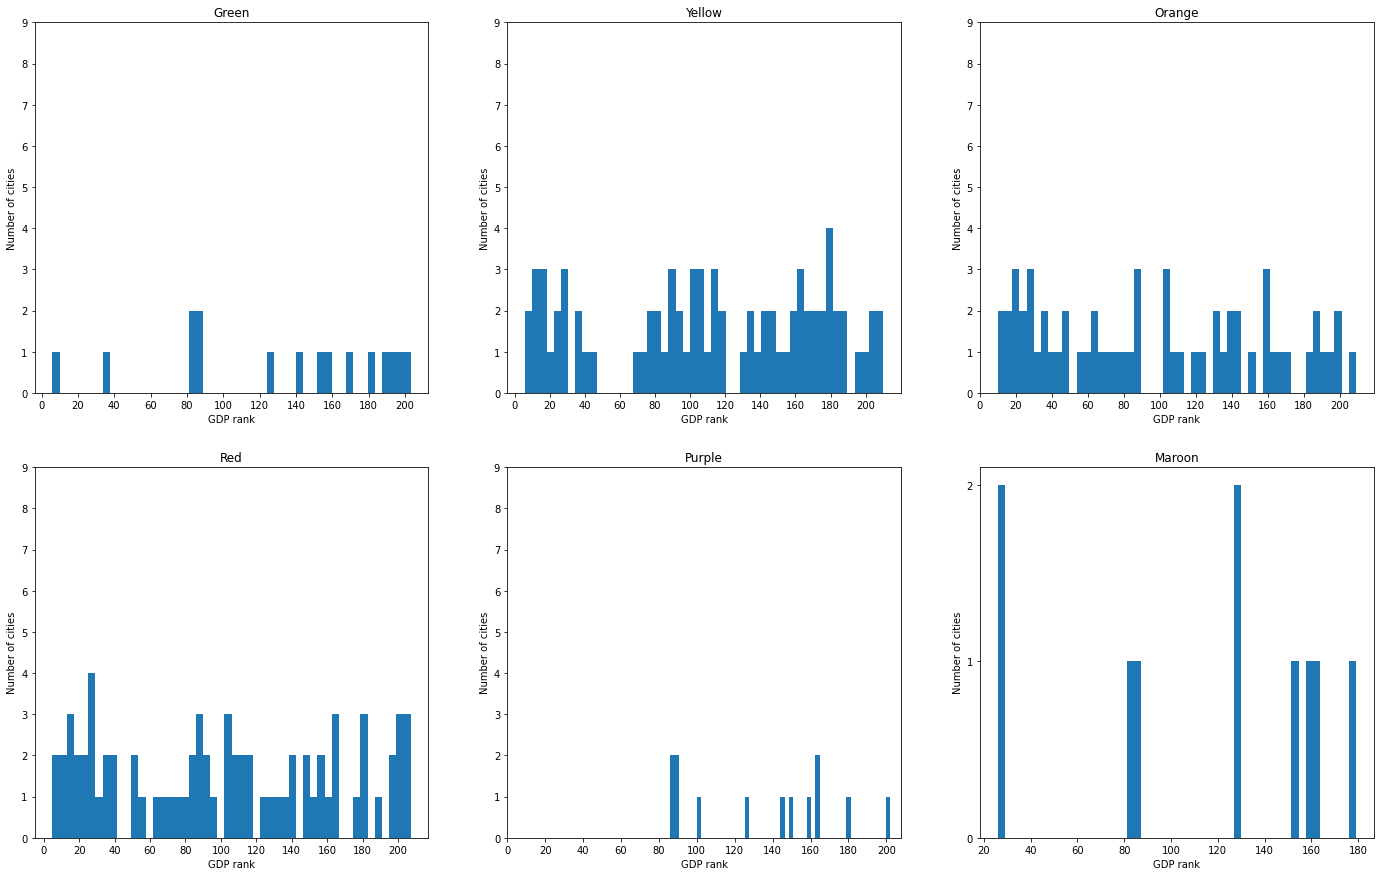

In [482]:
plot_hist('max_AQI',df_re=df_result)

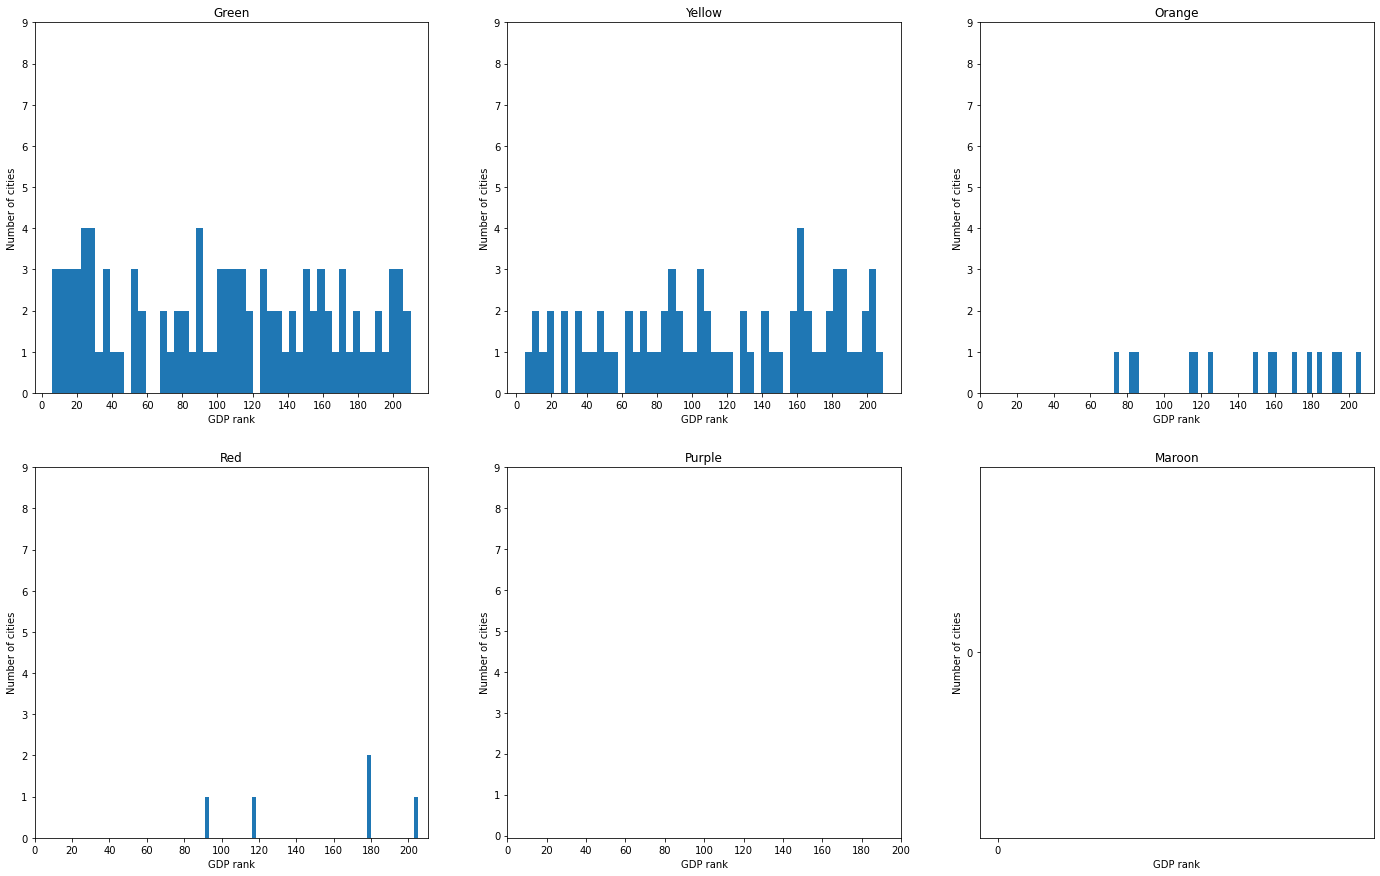

In [483]:
plot_hist('min_AQI',df_re=df_result)

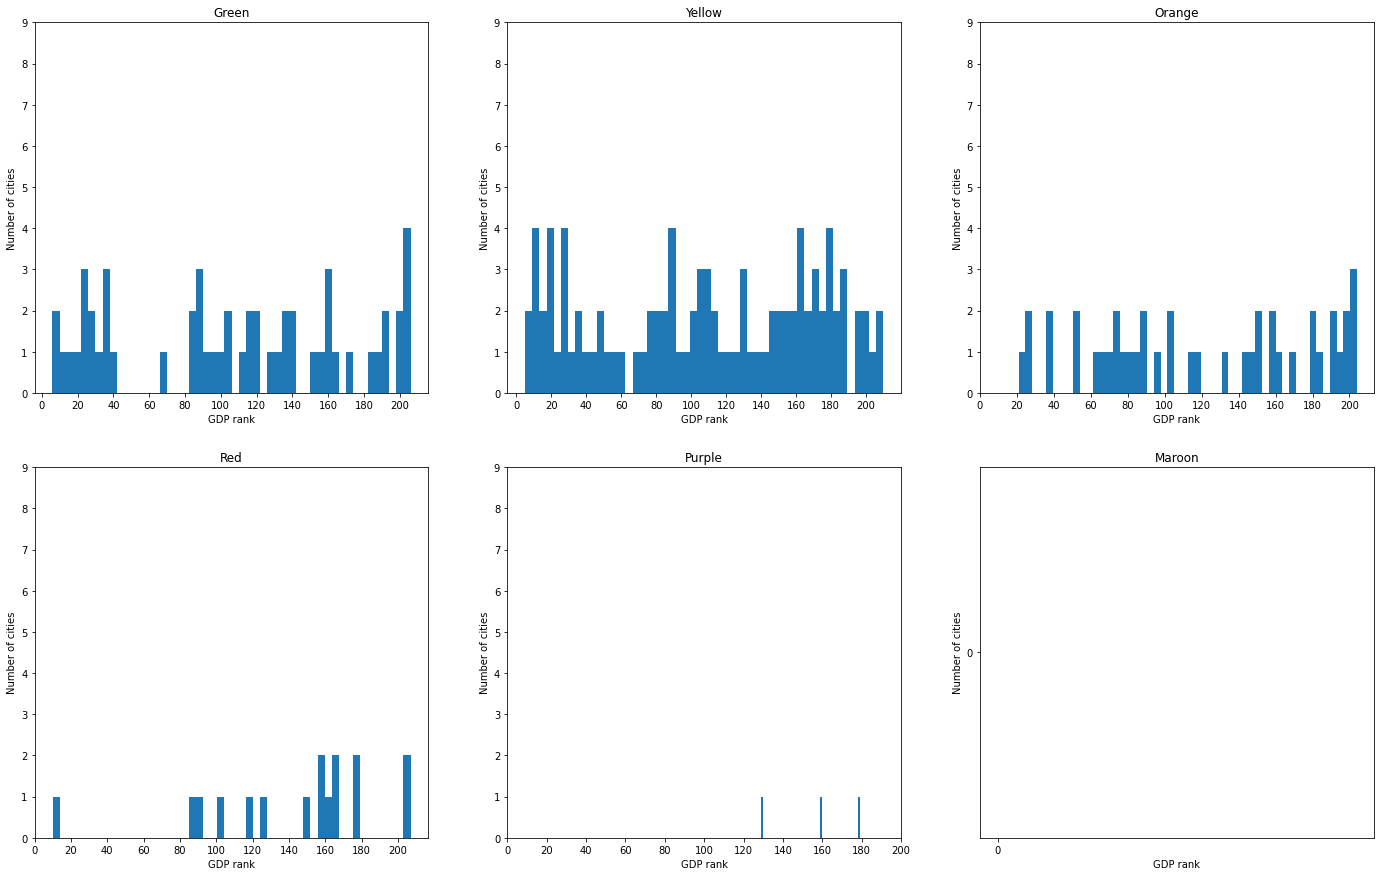

In [484]:
plot_hist('avg_AQI',df_re=df_result)